Align forecasted and observed temperatures per region.
--

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## 1. Load and plot data.

In [2]:
load_temp = pd.read_excel(os.path.join('/Users/anastasiagolubkova/Downloads','Observed_Forecasted_Temp.xlsx'),parse_dates=True) 

In [3]:
load_temp.head(5)

,from,to,obs_NE,prog_NE,obs_SECO,prog_SECO,obs_N,prog_N,obs_S,prog_S
0,2017-01-01 00:00:00,2017-01-01 01:00:00,0.000000,0.0,0.000,0.0,0.000000,0.0,0.000000,0.0
1,2017-01-01 01:00:00,2017-01-01 02:00:00,27.367001,0.0,24.889,0.0,25.209999,0.0,23.905001,0.0
2,2017-01-01 02:00:00,2017-01-01 03:00:00,26.237000,0.0,24.791,0.0,25.080000,0.0,22.938999,0.0
3,2017-01-01 03:00:00,2017-01-01 04:00:00,26.219999,0.0,24.250,0.0,25.209999,0.0,23.132999,0.0
4,2017-01-01 04:00:00,2017-01-01 05:00:00,26.049999,0.0,24.365,0.0,25.080000,0.0,22.650000,0.0


/Users/anastasiagolubkova/anaconda3/envs/exts-ml/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


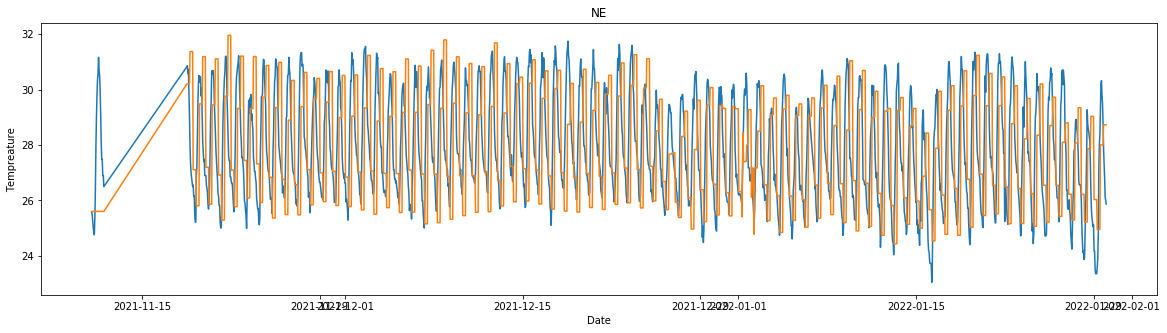

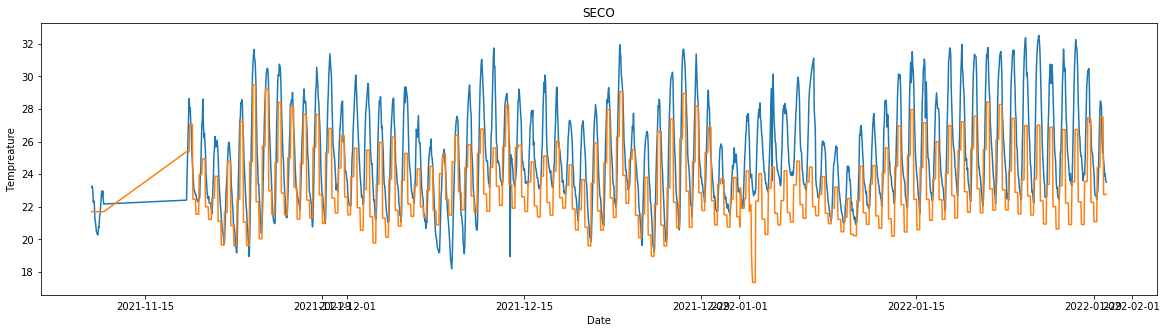

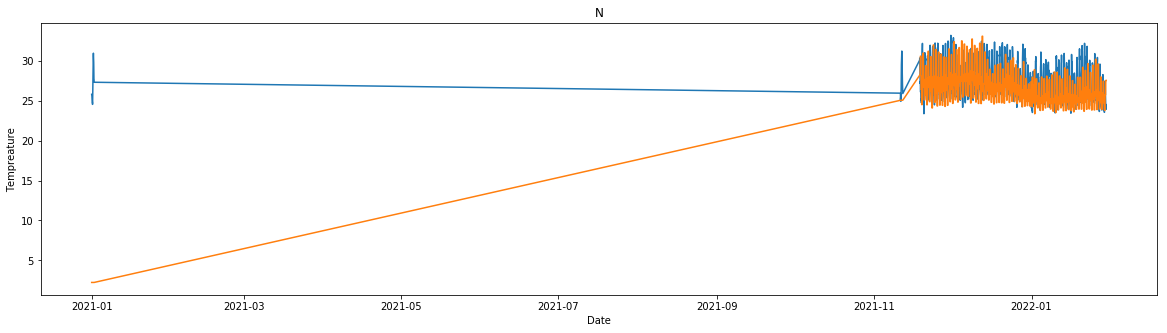

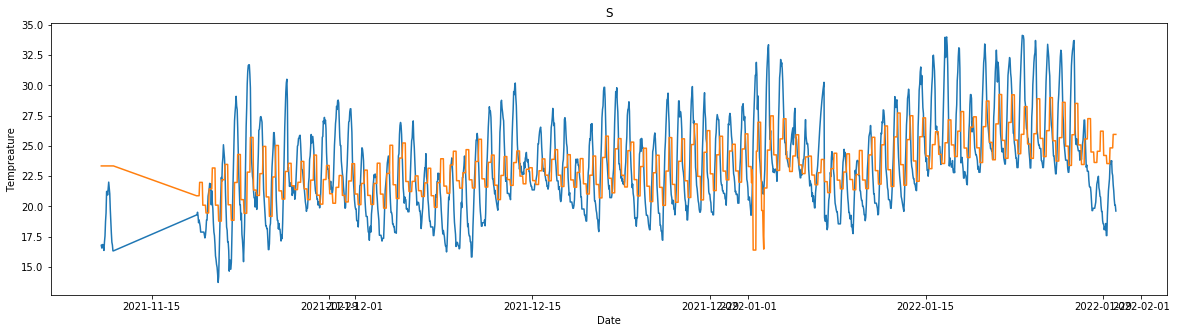

In [4]:
region = "";

for col in load_temp.columns[range(2,10,2)]:
    
    region=(col[col.find("_")+1:])
    df = load_temp[{"from","obs_"+region,"prog_"+region}]

    plt.figure(figsize=(20,5))
    # Observations
    plt.plot(df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0)]["from"],\
            df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0)]["obs_"+region])
    # Forecast
    plt.plot(df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0)]["from"],\
    df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0)]["prog_"+region])

    plt.xlabel('Date')
    plt.ylabel('Tempreature')
    plt.title(region)
    plt.show();

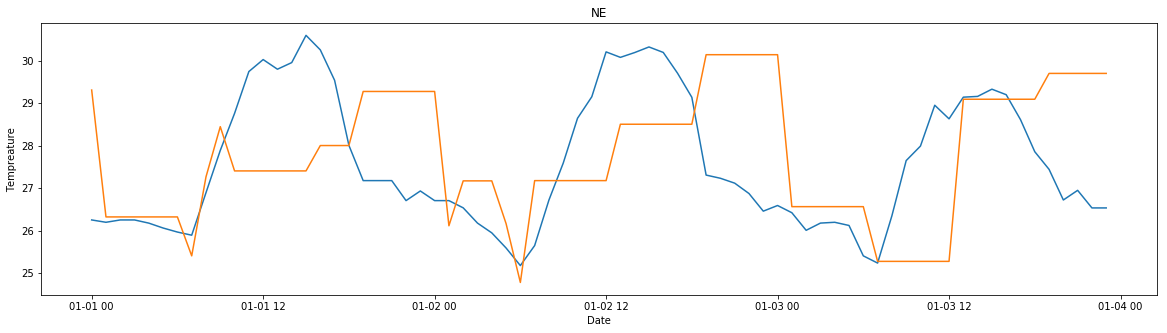

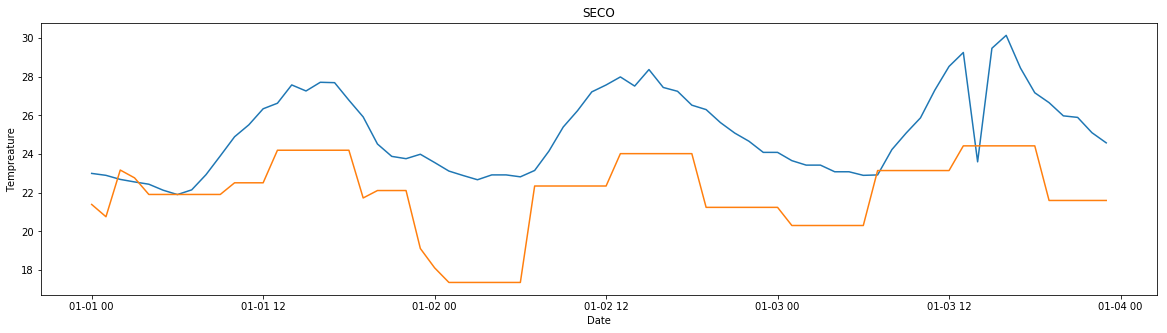

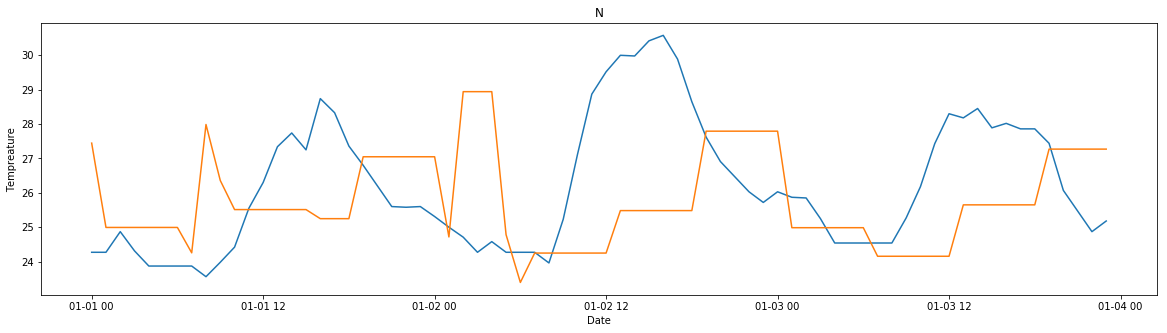

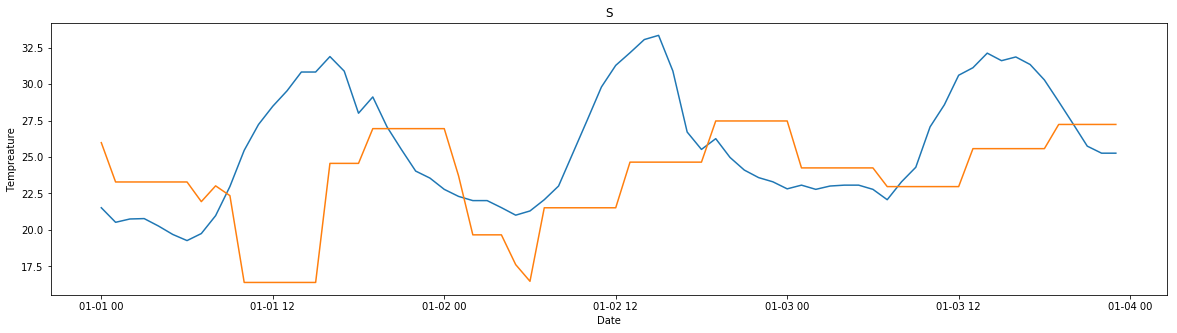

In [5]:
start = datetime.date(2022,1,1)
end = datetime.date(2022,1,3)

region = "";

for col in load_temp.columns[range(2,10,2)]:
    
    region=(col[col.find("_")+1:])
    df = load_temp[{"from","obs_"+region,"prog_"+region}]

    plt.figure(figsize=(20,5))
    # Observations
    plt.plot(df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
                   (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["from"],\
             df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
                   (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["obs_"+region])
    # Forecast
    plt.plot(df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
                   (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["from"],\
    df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
          (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["prog_"+region])

    plt.xlabel('Date')
    plt.ylabel('Tempreature')
    plt.title(region)
    plt.show();

Shift the forecast:

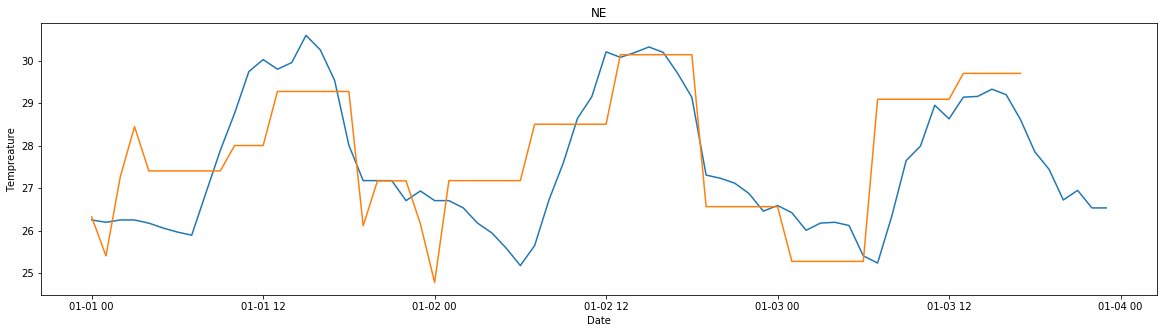

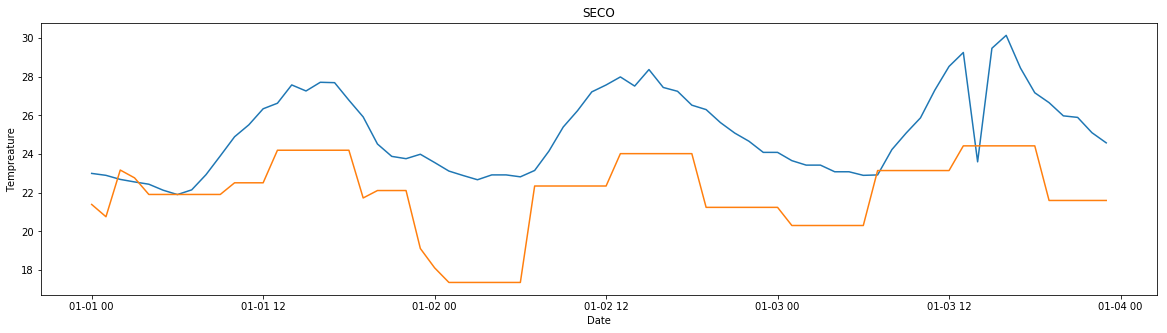

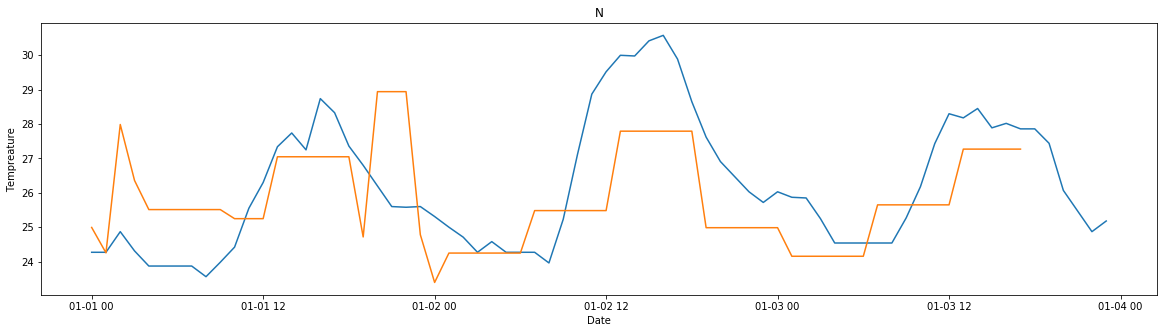

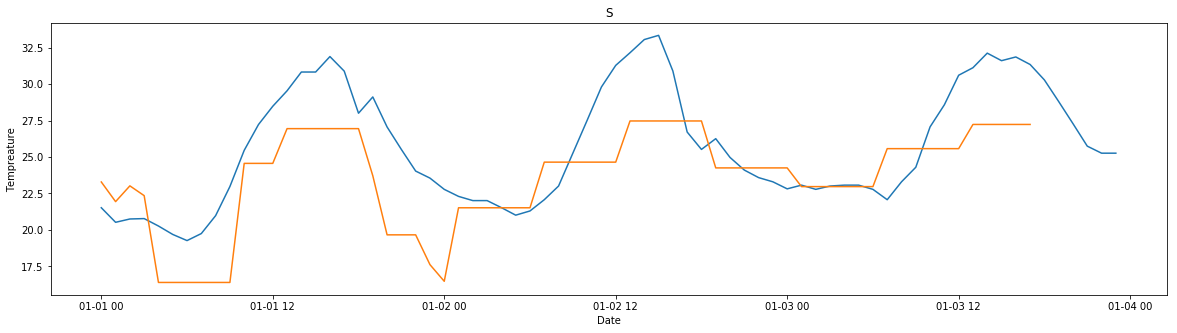

In [35]:
start = datetime.date(2022,1,1)
end = datetime.date(2022,1,3)
step_SECO = 0 # hours
step_N = -6
step_all = -6

region = "";

for col in load_temp.columns[range(2,10,2)]:
    
    region=(col[col.find("_")+1:])
    df = load_temp[{"from","obs_"+region,"prog_"+region}]
    
    step = 0;
    if region == "SECO":
        step = step_SECO
    elif region == "N":
        step = step_N
    else:
        step = step_all

    plt.figure(figsize=(20,5))
    # Observations
    plt.plot(df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
                   (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["from"],\
             df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
                   (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["obs_"+region])
    # Forecast
    plt.plot(df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
                   (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["from"],\
    df.loc[(df["obs_"+region]!=0) & (df["prog_"+region]!=0) & \
          (df["from"].dt.date>=start) & (df["from"].dt.date<=end)]["prog_"+region].shift(step))
        

    plt.xlabel('Date')
    plt.ylabel('Tempreature')
    plt.title(region)
    plt.show();

## 2. Observed vs forecasted temperatures: linear model.

In [36]:
temp_df = load_temp.copy()

In [37]:
region = "";

for col in temp_df.columns[range(3,10,2)]:
    region=(col[col.find("_")+1:])
    
    if region == "SECO":
        step = step_SECO
    elif region == "N":
        step = step_N
    else:
        step = step_all
        
    temp_df["prog_shift_"+region] = temp_df[col].shift(step)

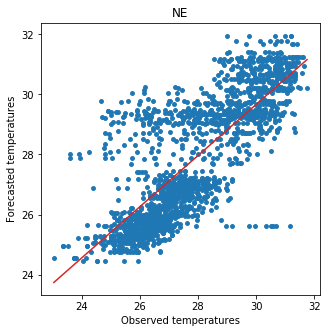

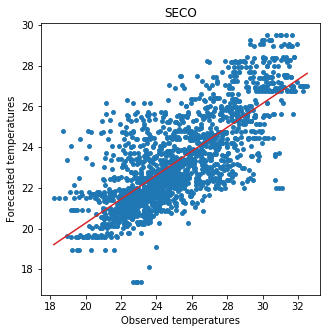

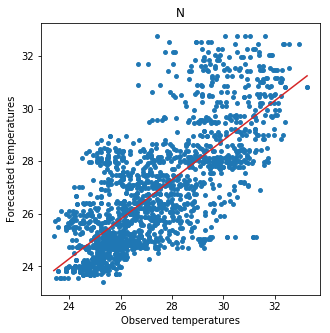

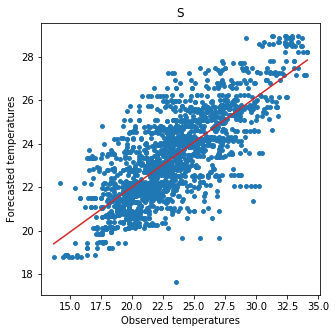

In [38]:
region = "";
OLS_coefs = [];
regions = [];

for col in load_temp.columns[range(2,10,2)]:
    
    region=(col[col.find("_")+1:])
    df = temp_df[{"from","obs_"+region,"prog_"+region,"prog_shift_"+region}]
    
    # Thresholds to remove outliers
    p25 = np.percentile(df.loc[(temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
               (temp_df["prog_shift_"+region]!=0)]["prog_shift_"+region],25)
    p75 = np.percentile(df.loc[(temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
               (temp_df["prog_shift_"+region]!=0)]["prog_shift_"+region],75)
    iqr = p75-p25
    upper_threshold = p75+1.5*iqr
    lower_threshold = p25-1.5*iqr
    
    mask_with_outliers = (temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
    (temp_df["prog_shift_"+region]!=0)
    mask_without_outliers = (temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
    (temp_df["prog_shift_"+region]!=0) & (temp_df["prog_shift_"+region]>lower_threshold) & \
    (temp_df["prog_shift_"+region]<upper_threshold)
    
    x = temp_df[mask_without_outliers]["obs_"+region]
    y = temp_df[mask_without_outliers]["prog_shift_"+region]

    coefs = np.polyfit(x,y,1)
    regions.append(region)
    OLS_coefs.append(coefs)
    
    plt.figure(figsize=(5,5))
    plt.scatter(x,y,s=15)
    x_values = np.linspace(x.min(),x.max(),num=100)
    y_values = np.polyval(coefs,x_values)
    plt.plot(x_values, y_values, c='C3', label='polyfit(deg=1)')
    plt.xlabel('Observed temperatures')
    plt.ylabel('Forecasted temperatures')
    plt.title(region)
    plt.show();

Compute Pearson correlation coefficient:

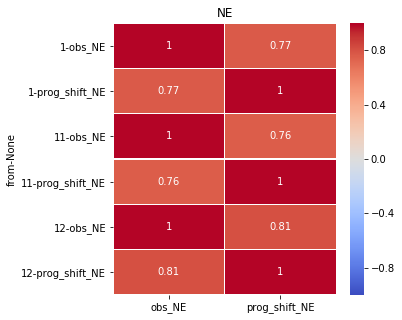

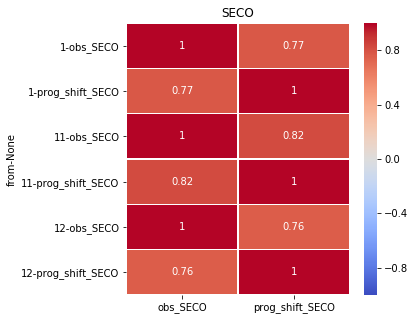

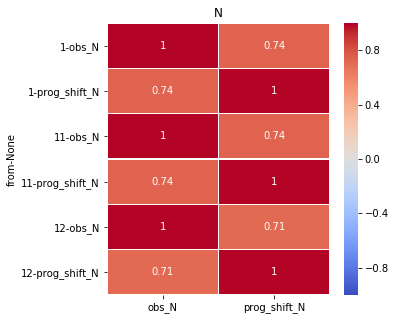

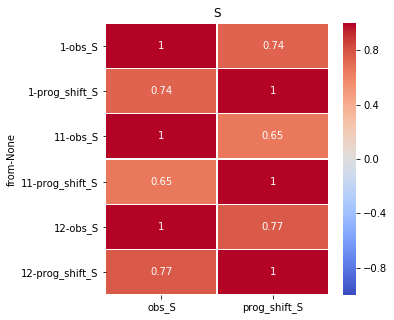

In [39]:
region = "";

for col in load_temp.columns[range(2,10,2)]:
    
    region=(col[col.find("_")+1:])
    df = temp_df[{"from","obs_"+region,"prog_"+region,"prog_shift_"+region}]
    
    # Thresholds to remove outliers
    p25 = np.percentile(df.loc[(temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
               (temp_df["prog_shift_"+region]!=0)]["prog_shift_"+region],25)
    p75 = np.percentile(df.loc[(temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
               (temp_df["prog_shift_"+region]!=0)]["prog_shift_"+region],75)
    iqr = p75-p25
    upper_threshold = p75+1.5*iqr
    lower_threshold = p25-1.5*iqr
    
    mask_with_outliers = (temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
    (temp_df["prog_shift_"+region]!=0)
    mask_without_outliers = (temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
    (temp_df["prog_shift_"+region]!=0) & (temp_df["prog_shift_"+region]>lower_threshold) & \
    (temp_df["prog_shift_"+region]<upper_threshold)
    
    x = temp_df[mask_without_outliers]["obs_"+region]
    y = temp_df[mask_without_outliers]["prog_shift_"+region]

    dfcorr = pd.concat([temp_df[mask_without_outliers]["from"],\
                    temp_df[mask_without_outliers]["obs_"+region],\
                    temp_df[mask_without_outliers]["prog_shift_"+region]],axis=1)
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(region);
    sns.heatmap(dfcorr.groupby(dfcorr["from"].dt.month).corr(),vmin=-1, vmax=1, cmap="coolwarm", \
                annot=True, linewidths=.5, ax=ax)

In [40]:
calculated_coefs = pd.DataFrame({"region":regions,"coef_a":np.array(OLS_coefs)[:,0],\
                                 "coef_b":np.array(OLS_coefs)[:,1]})

In [41]:
def RMSE(y,y_pred):
    return(np.sqrt(np.mean((y-y_pred)**2)))

In [42]:
region = "";
errors = [];

for col in load_temp.columns[range(2,10,2)]:
    
    region=(col[col.find("_")+1:])
    df = temp_df[{"from","obs_"+region,"prog_"+region,"prog_shift_"+region}]
    
    # Thresholds to remove outliers
    p25 = np.percentile(df.loc[(temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
               (temp_df["prog_shift_"+region]!=0)]["prog_shift_"+region],25)
    p75 = np.percentile(df.loc[(temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
               (temp_df["prog_shift_"+region]!=0)]["prog_shift_"+region],75)
    iqr = p75-p25
    upper_threshold = p75+1.5*iqr
    lower_threshold = p25-1.5*iqr
    
    mask_with_outliers = (temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
    (temp_df["prog_shift_"+region]!=0)
    mask_without_outliers = (temp_df["obs_"+region]!=0) & (temp_df["prog_"+region]!=0) & \
    (temp_df["prog_shift_"+region]!=0) & (temp_df["prog_shift_"+region]>lower_threshold) & \
    (temp_df["prog_shift_"+region]<upper_threshold)
    
    x = temp_df[mask_without_outliers]["obs_"+region]
    y = temp_df[mask_without_outliers]["prog_shift_"+region]
    y_pred = calculated_coefs.loc[calculated_coefs.region==region].coef_a.iloc[0]*x + \
    calculated_coefs.loc[calculated_coefs.region==region].coef_b.iloc[0]
    
    errors.append(RMSE(y,y_pred))

In [43]:
errors

[1.2522357147434013, 1.4713731900950044, 1.468206964826158, 1.3377883694687465]

In [34]:
calculated_coefs

,region,coef_a,coef_b
0,NE,0.852517,4.093411
1,SECO,0.587138,8.526268
2,N,0.597245,10.450121
3,S,0.414484,13.704208
